In [158]:
import numpy as np
import struct
from xgrads import open_CtlDataset 
# import pandas as pd
# import xarray as xr
# import geopandas as gpd
# import regionmask, struct
import matplotlib.pyplot as plt
import rioxarray
from pyproj import Transformer
import cartopy.crs as ccrs

In [159]:
obj = ccrs.LambertAzimuthalEqualArea(105, 47)
obj_proj = obj.to_string()

target_proj = ccrs.LambertAzimuthalEqualArea(125, 67)
target_proj = target_proj.to_string()

# obj_proj = 'EPSG:3408'

print(target_proj)

transformer = Transformer.from_crs('EPSG:4326', 'EPSG:3408')
transformer_inv = Transformer.from_crs('EPSG:3408', 'EPSG:4326')

workplace = './'

+proj=laea +ellps=WGS84 +lon_0=125 +lat_0=67 +x_0=0.0 +y_0=0.0 +no_defs +type=crs


In [160]:
icesheet = rioxarray.open_rasterio('IceMask01.asc').rio.write_crs('EPSG:3408')

# icesheet = icesheet.rio.reproject('EPSG:4326')

In [161]:
drang = rioxarray.open_rasterio('PanArcticMask01.asc').rio.write_crs('EPSG:3408')

In [162]:
basin = rioxarray.open_rasterio('DrainageBasinMask01.asc').rio.write_crs('EPSG:3408')

#  Processsing Vegetation ...

In [163]:
vege = rioxarray.open_rasterio('temveg2arctic1999.ease.asc').rio.write_crs('EPSG:3408') #.rio.write_nodata(-9999, inplace=True)#.rio.reproject('EPSG:4326')

# vege = vege.rio.reproject('EPSG:4326')

# print(vege.shape)

vege.values[icesheet.values == 1] = -9999 # ocean
vege.values[icesheet.values == 2] = -9999 # ice
vege.values[icesheet.values == -9999] = -9999 # nodata

vege.values[drang.values == 0] = -9999
vege.values[drang.values == 1] = -9999
vege.values[drang.values == -9999] = -9999

vege.values[vege.values ==  0] = -9999
vege.values[vege.values ==  9] = -9999
vege.values[vege.values == 10] = -9999

# vege.values[(~np.isin(basin.values, [5])) 
#             & (~np.isin(basin.values, [4])) 
#             & (~np.isin(basin.values, [3]))
#             & (~np.isin(basin.values, [10]))
#             & (~np.isin(basin.values, [16]))
#             & (~np.isin(basin.values, [23]))
#             & (~np.isin(basin.values, [32]))] = -9999
vege.values[(~np.isin(basin.values, [5]))] = -9999

# vege.values[~np.where((basin.values == 4) or (basin.values == 5))] = -9999

# aaa = 5E6
# bbb = 3.75E6
# ccc = -aaa
# ddd = -bbb

# maxx = 3.9E6
# maxy = 2.7E6
# minx = 1.4E6
# miny = 0.5E6

# maxx = 4.85E6
# maxy = 2.75E6
# minx = 1.45E6
# miny = -2.05E6

# maxx = 4.85E6
# maxy = 3.40E6
# minx = -4.85E6
# miny = -3.25E6

# maxx = 4.85E6
# maxy = 3.40E6
# minx = -1.5E6
# miny = -3.25E6

# vege = vege.rio.clip_box(
#     minx=minx,
#     miny=miny,
#     maxx=maxx,
#     maxy=maxy,
# )

# vege = vege.rio.reproject(obj_proj)

print(np.sum(vege.values > 0))

np.unique(vege.values.flatten())

3910


array([-9999,     2,     3,     4,     5], dtype=int32)

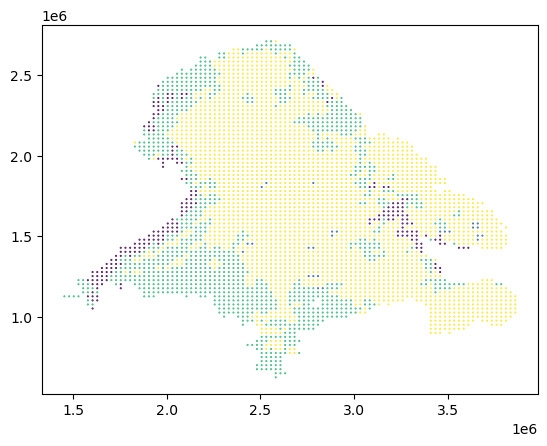

In [164]:
lon, lat = np.meshgrid(vege.x, vege.y)
plt.scatter(lon[vege.values[0,:,:]>0], lat[vege.values[0,:,:]>0], 
            c = vege.values[0,:,:][vege.values[0,:,:]>0], 
            s=0.25)

#  Processsing Topography ...

In [166]:
topo = rioxarray.open_rasterio('g_mean.asc').rio.write_crs('EPSG:3408') #.rio.write_nodata(-9999, inplace=True)#.rio.reproject('EPSG:4326')

topo.values[icesheet.values == 1] = -9999 # ocean
topo.values[icesheet.values == 2] = -9999 # ice
topo.values[icesheet.values == -9999] = -9999 # nodata

topo.values[drang.values == 0] = -9999
topo.values[drang.values == 1] = -9999
topo.values[drang.values == -9999] = -9999

# aaa = 5E6
# bbb = 3.75E6

# topo = topo.rio.clip_box(
#     minx=minx,
#     miny=miny,
#     maxx=maxx,
#     maxy=maxy,
# )

topo.values[vege.values ==  0] = -9999
topo.values[vege.values ==  9] = -9999
topo.values[vege.values == 10] = -9999
topo.values[vege.values == -9999] = -9999

topo.values = np.floor(topo.values)

topo_proj = topo.rio.reproject('EPSG:4326')

print(np.sum(topo.values > 0))

topo

3910


<xarray.DataArray (band: 1, y: 721, x: 721)>
array([[[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        ...,
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.]]],
      dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -9.024e+06 -8.999e+06 ... 8.999e+06 9.024e+06
  * y            (y) float64 9.024e+06 8.999e+06 ... -8.999e+06 -9.024e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Point
    _FillValue:     -9999.0
    scale_factor:   1.0
    add_offset:     0.0

lat_max=73.23 lat_min=52.70
lon_max=141.12 lon_min=103.62


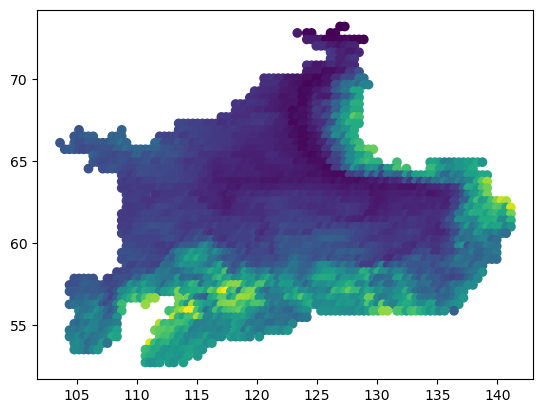

In [175]:
# Check lat lon map ...

lon2, lat2 = np.meshgrid(topo_proj.x, topo_proj.y)
plt.scatter(lon2[topo_proj.values[0,:,:]>0], lat2[topo_proj.values[0,:,:]>0], c = topo_proj.values[0,:,:][topo_proj.values[0,:,:]>0])

print("lat_max={:0.2f}".format(lat2[topo_proj.values[0,:,:]>0].max()), 
      "lat_min={:0.2f}".format(lat2[topo_proj.values[0,:,:]>0].min()))

print("lon_max={:0.2f}".format(lon2[topo_proj.values[0,:,:]>0].max()), 
      "lon_min={:0.2f}".format(lon2[topo_proj.values[0,:,:]>0].min()))

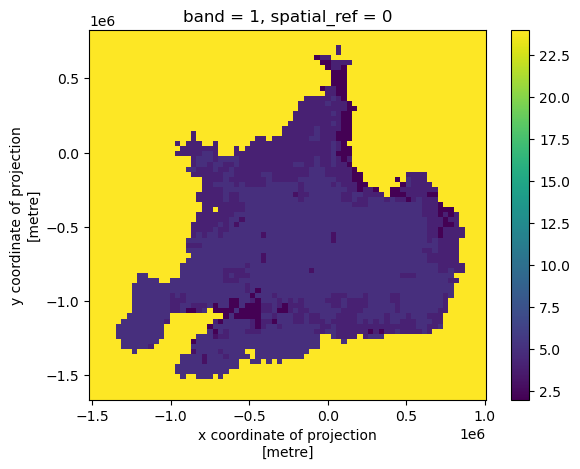

In [188]:
# CLIP RASTER FILES ...

maxx = 1.0E6
maxy = 0.80E6
minx = -1.5E6
miny = -1.65E6

vege00 = vege.copy()

vege00 = vege00.rio.reproject(target_proj)

vege01 = vege00.rio.clip_box(
    minx=minx,
    miny=miny,
    maxx=maxx,
    maxy=maxy,
)

vege01.values[vege01.values == -9999] = 24
vege01.rio.to_raster('vege.asc')

vege01.plot()

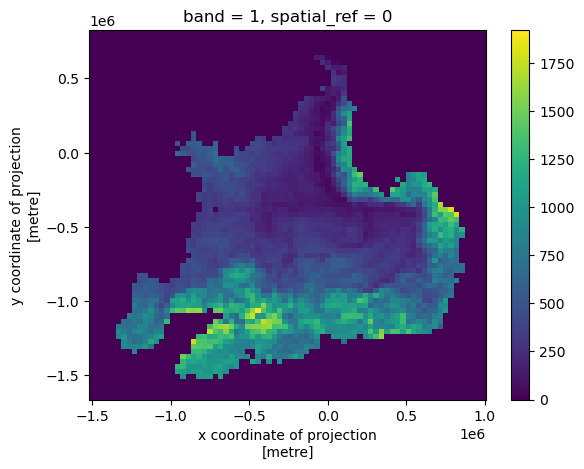

In [192]:
# CLIP RASTER FILES ...

topo00 = topo.copy()

topo00 = topo00.rio.reproject(target_proj)

topo01 = topo00.rio.clip_box(
    minx=minx,
    miny=miny,
    maxx=maxx,
    maxy=maxy,
)

topo01.values[topo01.values == -9999] = 0
topo01.rio.to_raster('topo.asc')

topo01.plot()

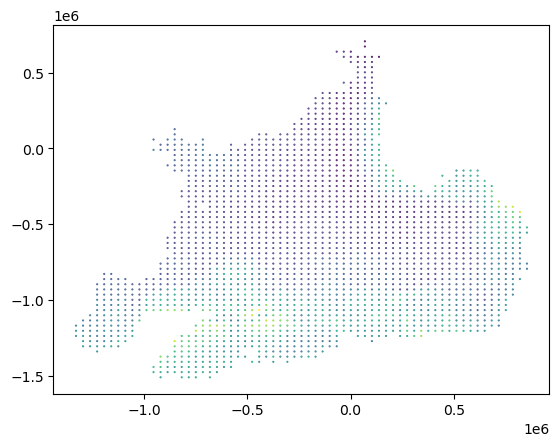

In [193]:
xxx, yyy = np.meshgrid(topo01.x, topo01.y)
plt.scatter(xxx[topo01.values[0,:,:]>0], yyy[topo01.values[0,:,:]>0], 
            c = topo01.values[0,:,:][topo01.values[0,:,:]>0], 
            s=0.25)

(73, 74) 154.98780204562195 83.32484910984743
(73, 74) 74.26504679977062 49.92095273708983


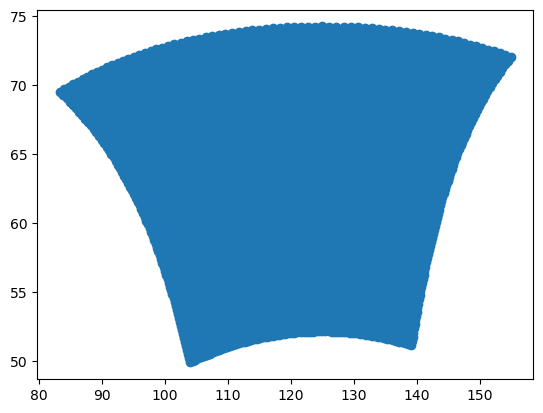

In [196]:
transformer_inv2 = Transformer.from_crs(target_proj, 'EPSG:4326')

lat, lon = transformer_inv2.transform(xxx, yyy)

plt.scatter(lon, lat)

xx00 = topo01.copy()
xx00.values[0,:,:] = lon + 0.0
xx00.rio.to_raster('../extra_met/grid_lon.asc')

yy00 = topo01.copy()
yy00.values[0,:,:] = lat + 0.0
yy00.rio.to_raster('../extra_met/grid_lat.asc')

In [197]:
%run ../../utils/asc_topo_veg_to_grads.py topo.asc vege.asc topo_vege.gdat

%run ../../utils/asc_to_grads.py ../extra_met/grid_lat.asc ../extra_met/grid_lat.gdat
%run ../../utils/asc_to_grads.py ../extra_met/grid_lon.asc ../extra_met/grid_lon.gdat

['../../utils/asc_topo_veg_to_grads.py', 'topo.asc', 'vege.asc', 'topo_vege.gdat']


/Users/kangwang/mambaforge/lib/python3.9/site-packages/xgrads/io.py:216: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  da = xr.DataArray(name=v.name, data=data, dims=dims, coords=coords,
/Users/kangwang/mambaforge/lib/python3.9/site-packages/xgrads/io.py:216: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values t

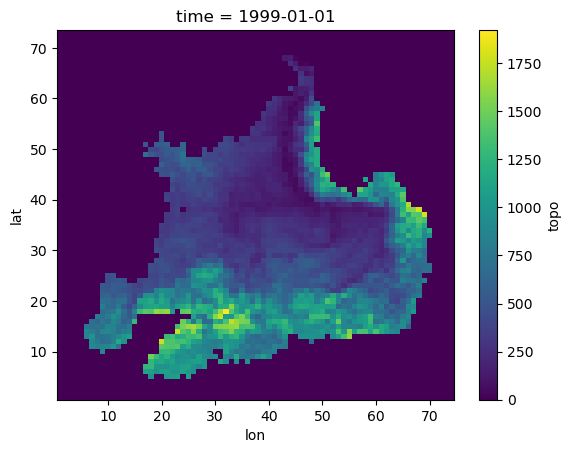

In [198]:
tz0 = open_CtlDataset('topo_vege.ctl')

tz0.topo.plot()

/Users/kangwang/mambaforge/lib/python3.9/site-packages/xgrads/io.py:216: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  da = xr.DataArray(name=v.name, data=data, dims=dims, coords=coords,


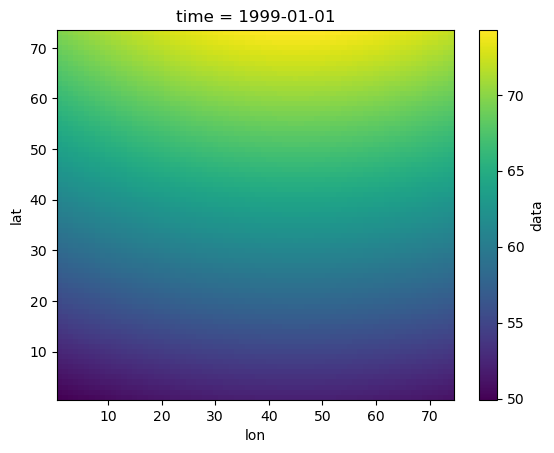

In [199]:
tz1 = open_CtlDataset('../extra_met/grid_lat.ctl')

tz1.data.plot()

/Users/kangwang/mambaforge/lib/python3.9/site-packages/xgrads/io.py:216: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  da = xr.DataArray(name=v.name, data=data, dims=dims, coords=coords,


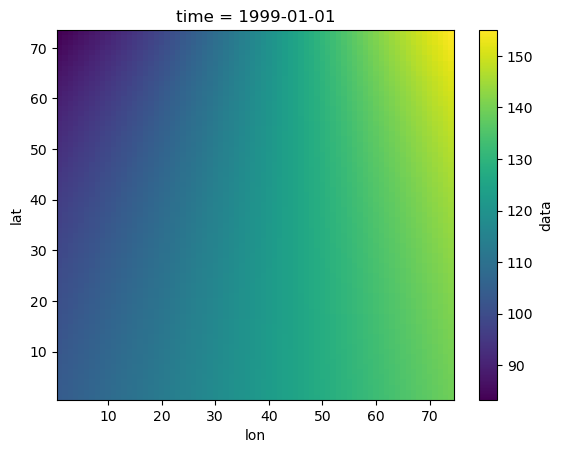

In [200]:
tz2 = open_CtlDataset('../extra_met/grid_lon.ctl')

tz2.data.plot()